# 2) 카페 데이터 분석 (카페 밀집 지역 도출)


## 공유컵 사업 참여 추천 지역, 범위 설정
  ### 1) 카페 매장 수 folium 그리기 
        
        
  ### 2) 대중교통 위치 표시
  - 버스 승하차가 가장 많이 일어나는 정류장 10곳
  - 부산시 지하철역 위치 표시
        
               
#### ⇒  결론: 두 고려사항을 충족하는 지역 = 공유컵 시행 최적 지역 을 찾기 위함

In [1]:
import pandas as pd
import numpy as np
import json
import folium

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams, style, font_manager, rc
import matplotlib as mpl
from matplotlib import cm, colors

In [2]:
# 한글폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
# 마이너스 깨질 때
mpl.rcParams['axes.unicode_minus']=False

In [4]:
colors = ['red','orange','green','skyblue','blue','navy','purple','pink','olive','brown','gray','cyan','lightgreen','salmon','violet','orchid'
         ,'magenta','yellow','lime','limegreen','linen','maroon','mediumaquamarine','aquamarine','lawngreen']
EPS = [0.0001,0.0005,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.05,0.1,0.5]

# 1.데이터 준비
## 1) 데이터 확인

In [5]:
busan = pd.read_csv('./data/소상공인시장진흥공단_상가(상권)정보_부산_202206.csv')
busan.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074,48974.0,NaN,NaN,NaN,129.023668,35.100979


In [6]:
busan.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
busan.상권업종중분류명.unique()

array(['모텔/여관/여인숙', '닭/오리요리', '의복의류', '한식', '사진', '가정/주방/인테리어', '유흥주점',
       '물품기기대여', '선물/팬시/기념품', '이/미용/건강', '음/식료품소매', '커피점/카페', '학원-어학',
       '자동차/자동차용품', '실내운동시설', '사무/문구/컴퓨터', '세탁/가사서비스', '자동차/이륜차',
       '운동/경기용품소매', 'PC/오락/당구/볼링등', '양식', '종합소매점', '중식', '학원-보습교습입시',
       '패스트푸드', '부동산중개', '사진/광학/정밀기기소매', '무도/유흥/가무', '철물/난방/건설자재소매',
       '주유소/충전소', '개인서비스', '의약/의료품소매', '주택수리', '분식', '학원-음악미술무용', '학원기타',
       '도서관/독서실', '페인트/유리제품소매', '일식/수산물', '가전제품소매', '화장품소매', '가방/신발/액세서리',
       '예술품/골동품/수석/분재', '가구소매', '대중목욕탕/휴게', '스포츠/운동', '시계/귀금속소매', '유아교육',
       '건강/미용식품', '기타판매업', '호텔/콘도', '중고품소매/교환', '책/서적/도서', '캠프/별장/펜션',
       '개인/가정용품수리', '별식/퓨전요리', '요가/단전/마사지', '인력/고용/용역알선', '제과제빵떡케익',
       '학문교육기타', '운송/배달/택배', '기타음식업', '광고/인쇄', '학원-예능취미체육', '분양',
       '취미/오락관련소매', '연극/영화/극장', '예식/의례/관혼상제', '부페', '유아용품', '법무세무회계',
       '기타서비스업', '경마/경륜/성인오락', '실외운동시설', '운영관리시설', '애견/애완/동물', '대행업',
       '학원-컴퓨터', '민박/하숙', '평가/개발/관리', '학원-자격/국가고시', '학원-창업취업취미',
       '놀이/여가/취미',

## 2)데이터 정제
### 2-1) 개인 카페로 한정

In [8]:
cafe = busan[busan['상권업종중분류명'] == '커피점/카페']
cafe.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
15,20526716,투썸플레이스,대연점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2629010600100760001000452,NaN,부산광역시 남구 수영로 286,608020,48499.0,NaN,1,NaN,129.097701,35.135963


In [9]:
cafe.상권업종소분류명.unique()

array(['커피전문점/카페/다방', '사주카페', '전통찻집/인삼찻집', '생과일주스전문점', '애견카페', '보드게임카페'],
      dtype=object)

In [10]:
cafe = cafe[cafe.상권업종소분류명.isin(['커피전문점/카페/다방','생과일주스전문점','전통찻집/인삼찻집'])]

In [11]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6807 entries, 15 to 152898
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     6807 non-null   int64  
 1   상호명        6807 non-null   object 
 2   지점명        2555 non-null   object 
 3   상권업종대분류코드  6807 non-null   object 
 4   상권업종대분류명   6807 non-null   object 
 5   상권업종중분류코드  6807 non-null   object 
 6   상권업종중분류명   6807 non-null   object 
 7   상권업종소분류코드  6807 non-null   object 
 8   상권업종소분류명   6807 non-null   object 
 9   표준산업분류코드   6807 non-null   object 
 10  표준산업분류명    6807 non-null   object 
 11  시도코드       6807 non-null   int64  
 12  시도명        6807 non-null   object 
 13  시군구코드      6807 non-null   int64  
 14  시군구명       6807 non-null   object 
 15  행정동코드      6807 non-null   int64  
 16  행정동명       6807 non-null   object 
 17  법정동코드      6807 non-null   int64  
 18  법정동명       6807 non-null   object 
 19  지번코드       6807 non-null   int64  
 20  대지구분코

### 2-2) 위치를 기반으로 한 클러스터링이므로, 필요한 위도/경도 그리고 혹시모를 지점명과 지번주소만 가져와서 데이터셋을 새로 생성

In [12]:
cafe = cafe[['상호명', '지점명', '도로명주소', '시군구명', '지번주소', '경도', '위도']]
cafe.head(5)

,상호명,지점명,도로명주소,시군구명,지번주소,경도,위도
15,투썸플레이스,대연점,부산광역시 남구 수영로 286,남구,부산광역시 남구 대연동 76-1,129.097701,35.135963
69,더리터,수영점,부산광역시 수영구 수영로 396-1,수영구,부산광역시 수영구 남천동 19-28,129.107896,35.141748
97,비움카페,NaN,부산광역시 기장군 기장읍 용궁길 68,기장군,부산광역시 기장군 기장읍 시랑리 416-34,129.221668,35.189328
104,로카페,NaN,부산광역시 기장군 정관읍 정관로 350,기장군,부산광역시 기장군 정관읍 모전리 730,129.164382,35.335824
229,콩카페,NaN,부산광역시 북구 시랑로 137,북구,부산광역시 북구 구포동 1235-12,129.010423,35.195485


In [13]:
cafe.fillna('',inplace=True)

In [14]:
cafe['상호지점명'] = cafe['상호명'] + cafe['지점명']

In [15]:
cafe

,상호명,지점명,도로명주소,시군구명,지번주소,경도,위도,상호지점명
15,투썸플레이스,대연점,부산광역시 남구 수영로 286,남구,부산광역시 남구 대연동 76-1,129.097701,35.135963,투썸플레이스대연점
69,더리터,수영점,부산광역시 수영구 수영로 396-1,수영구,부산광역시 수영구 남천동 19-28,129.107896,35.141748,더리터수영점
97,비움카페,,부산광역시 기장군 기장읍 용궁길 68,기장군,부산광역시 기장군 기장읍 시랑리 416-34,129.221668,35.189328,비움카페
104,로카페,,부산광역시 기장군 정관읍 정관로 350,기장군,부산광역시 기장군 정관읍 모전리 730,129.164382,35.335824,로카페
229,콩카페,,부산광역시 북구 시랑로 137,북구,부산광역시 북구 구포동 1235-12,129.010423,35.195485,콩카페
...,...,...,...,...,...,...,...,...
152863,반달커피,부산사직점,부산광역시 동래구 사직북로19번길 13,동래구,부산광역시 동래구 사직동 78-45,129.059828,35.197325,반달커피부산사직점
152867,고품격커피공장,신평점,부산광역시 사하구 신산북로 41,사하구,부산광역시 사하구 신평동 383,128.968087,35.092286,고품격커피공장신평점
152868,카페,드크래프트,부산광역시 해운대구 송정해변로 40,해운대구,부산광역시 해운대구 송정동 297-66,129.201600,35.180614,카페드크래프트
152895,요기,,부산광역시 금정구 무학송로 105,금정구,부산광역시 금정구 부곡동 60-4,129.093307,35.240528,요기


In [16]:
fc = pd.pivot_table(data = cafe, index='상호명',values='지번주소',aggfunc='count').sort_values(by='지번주소', ascending=False).reset_index()

In [17]:
fc.head()

,상호명,지번주소
0,카페,299
1,컴포즈커피,133
2,스타벅스,94
3,이디야커피,93
4,하삼동커피,69


In [18]:
fc_list = [x for x in fc[:50].상호명]
fc_list.remove('카페')
len(fc_list)

49

In [19]:
cafe = cafe[~cafe.상호지점명.str.contains('|'.join(fc_list))]

In [20]:
pd.pivot_table(data = cafe, index='상호명',values='지번주소',aggfunc='count').sort_values(by='지번주소', ascending=False).reset_index().head()

,상호명,지번주소
0,카페,239
1,커피빈,9
2,커피스토어,9
3,스몰굿커피,9
4,커피나무,8


In [21]:
gu_cafe = pd.pivot_table(data = cafe, index='시군구명',values='지번주소',aggfunc='count').sort_values(by='지번주소').reset_index()

In [22]:
gu_cafe

,시군구명,지번주소
0,서구,139
1,영도구,171
2,동구,196
3,연제구,214
4,사상구,218
5,중구,239
6,북구,248
7,사하구,276
8,강서구,299
9,동래구,348


<AxesSubplot:xlabel='시군구명', ylabel='지번주소'>

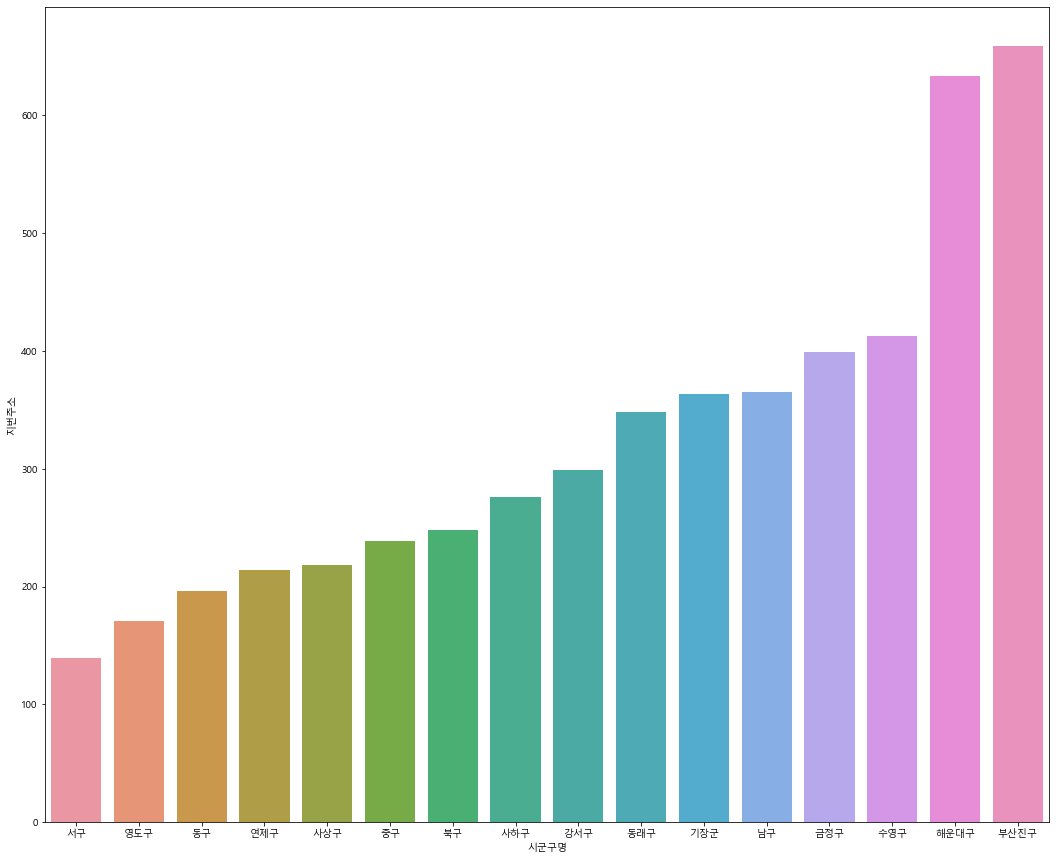

In [23]:
plt.figure(figsize = (18,15))

sns.barplot(data = gu_cafe, x='시군구명',y='지번주소')

## 부산시 구 별 카페 수 시각화

In [24]:
cafe.head(3)

,상호명,지점명,도로명주소,시군구명,지번주소,경도,위도,상호지점명
97,비움카페,,부산광역시 기장군 기장읍 용궁길 68,기장군,부산광역시 기장군 기장읍 시랑리 416-34,129.221668,35.189328,비움카페
104,로카페,,부산광역시 기장군 정관읍 정관로 350,기장군,부산광역시 기장군 정관읍 모전리 730,129.164382,35.335824,로카페
229,콩카페,,부산광역시 북구 시랑로 137,북구,부산광역시 북구 구포동 1235-12,129.010423,35.195485,콩카페


In [25]:
# 상호명으로브랜드의 개수 세어보기

gu = cafe["시군구명"].value_counts()
gu


부산진구    659
해운대구    633
수영구     413
금정구     399
남구      365
기장군     363
동래구     348
강서구     299
사하구     276
북구      248
중구      239
사상구     218
연제구     214
동구      196
영도구     171
서구      139
Name: 시군구명, dtype: int64

In [26]:
# 가공된 데이터 cafe_cnt.csv 저장
gu.to_csv('./data/cafe_cnt.csv', index=True, encoding='utf-8')

In [27]:
# 저장한 cafe_cnt.csv 불러오기
cafe_cnt = pd.read_csv('./data/cafe_cnt.csv', encoding='utf-8')
cafe_cnt

,Unnamed: 0,시군구명
0,부산진구,659
1,해운대구,633
2,수영구,413
3,금정구,399
4,남구,365
5,기장군,363
6,동래구,348
7,강서구,299
8,사하구,276
9,북구,248


In [28]:
# 컬럼명 변경
cafe_cnt = cafe_cnt.rename(columns={'Unnamed: 0':'구역','시군구명':'카페수'})
cafe_cnt.tail()

,구역,카페수
11,사상구,218
12,연제구,214
13,동구,196
14,영도구,171
15,서구,139


In [29]:
# json 불러오기
geo_path = './data/busan_gu.json'

geo_json = json.load(open(geo_path, encoding='utf-8'))

In [30]:
# 위도, 경도 설정
lat = 35.181784
long = 129.052852

In [31]:
# folium 사용하여 카페 수 표현

map = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=cafe_cnt,
    columns=['구역', '카페수'],
    key_on='feature.properties.name',
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='카페 수'
).add_to(map)

map

In [32]:
# 전국 행정구역 
data_draw_korea = pd.read_csv('./data/data_draw_korea.csv',encoding='utf-8')
data_draw_korea

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...,...
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시


In [33]:
# 조인하기 위해 컬럼을 만들기 -> 조인주소
data_draw_korea['조인주소'] = data_draw_korea['광역시도'] + ' ' + data_draw_korea['행정구역'] 
data_draw_korea.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역,조인주소
0,0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
2,2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시


In [34]:
# 컬럼생성이 제대로 되었는지 확인
data_draw_korea[data_draw_korea['조인주소'] == '부산광역시 부산진구']

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역,조인주소
114,114,365721,부산부산진,10,16,29.7,부산광역시,부산진구,부산광역시 부산진구


In [35]:
# 조인하기 위해 컬럼을 만들기 -> 조인주소
cafe_cnt['조인주소'] = '부산광역시 ' + cafe_cnt['구역']
cafe_cnt.head()

,구역,카페수,조인주소
0,부산진구,659,부산광역시 부산진구
1,해운대구,633,부산광역시 해운대구
2,수영구,413,부산광역시 수영구
3,금정구,399,부산광역시 금정구
4,남구,365,부산광역시 남구


In [36]:
# 각 데이터의 '조인주소' 컬럼으로 테이블 조인
busan_cafe = pd.merge(data_draw_korea, cafe_cnt, how='outer', left_on='조인주소', right_on='조인주소')

In [37]:
# 조인주소 컬럼으로 부산광역시 부산진구가 알맞게 이어졌는지 확인
busan_cafe[busan_cafe['조인주소'] == '부산광역시 부산진구']

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역,조인주소,구역,카페수
114,114,365721,부산부산진,10,16,29.7,부산광역시,부산진구,부산광역시 부산진구,부산진구,659.0


In [38]:
# null 값을 0으로 채우기
busan_cafe = busan_cafe.fillna(0)
busan_cafe

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역,조인주소,구역,카페수
0,0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시,0,0.0
1,1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군,0,0.0
2,2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시,0,0.0
3,3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시,0,0.0
4,4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
224,224,127462,제천,8,10,882.47,충청북도,제천시,충청북도 제천시,0,0.0
225,225,34480,증평,6,11,81.84,충청북도,증평군,충청북도 증평군,0,0.0
226,226,62809,진천,5,11,406.08,충청북도,진천군,충청북도 진천군,0,0.0
227,227,790216,청주,6,12,932.51,충청북도,청주시,충청북도 청주시,0,0.0


In [39]:
busan_cafe.to_csv('./data/busan_cafe2.csv', encoding='utf-8', index=True)

In [40]:
# 전국 블록맵 표시 좌표
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [41]:
# 블록맵 그리기 함수 정의
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.title(title, fontsize=20)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row['카페수'] > 600 else 'black' # 카페 수가 600 이상인 곳은 흰색으로 표시
    
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') :
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=3)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
   
    plt.show()      

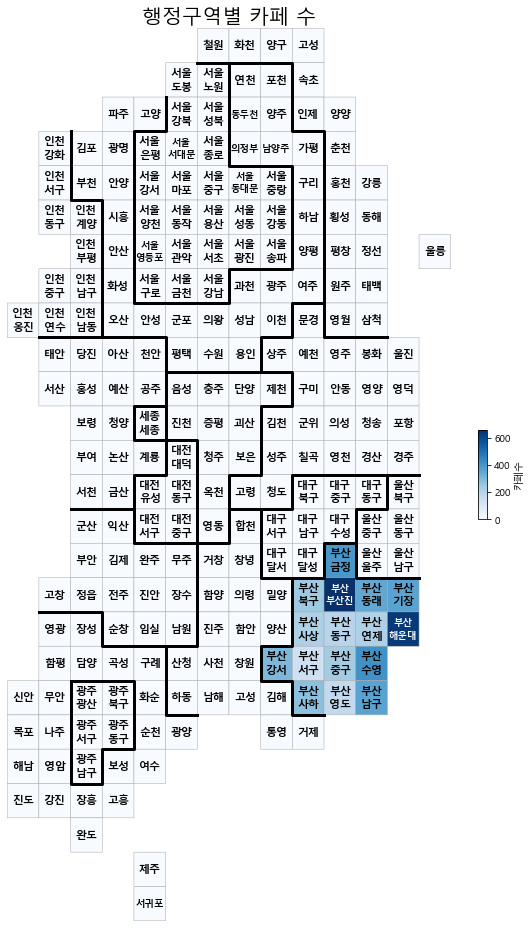

In [42]:
draw_blockMap(busan_cafe, '카페수', '행정구역별 카페 수', 'Blues')